In [1]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import MaxPooling2D,Conv2D, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SpatialDropout1D
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import sequence

import pandas as pd              
import numpy as np 

data = pd.read_csv("bible_data_set (with count and testament).csv")
data

,citation,book,chapter,verse,text,length (charcters),words,testament
0,Genesis 1:1,Genesis,1,1,In the beginning God created the heaven and th...,56,10,old
1,Genesis 1:2,Genesis,1,2,"And the earth was without form, and void; and ...",144,29,old
2,Genesis 1:3,Genesis,1,3,"And God said, Let there be light: and there wa...",56,11,old
3,Genesis 1:4,Genesis,1,4,"And God saw the light, that it was good: and G...",87,17,old
4,Genesis 1:5,Genesis,1,5,"And God called the light Day, and the darkness...",117,22,old
...,...,...,...,...,...,...,...,...
31097,Revelation 22:17,Revelation,22,17,"And the Spirit and the bride say, Come. And le...",170,33,new
31098,Revelation 22:18,Revelation,22,18,For I testify unto every man that heareth the ...,189,37,new
31099,Revelation 22:19,Revelation,22,19,And if any man shall take away from the words ...,209,44,new
31100,Revelation 22:20,Revelation,22,20,"He which testifieth these things saith, Surely...",97,16,new


In [2]:
import nltk
from nltk.stem import PorterStemmer

ps = PorterStemmer() 

vocabulary_size = 0
word2location = {}

def prepare_vocabulary(data):
    index = 0
    for sentance in data['text']:
        #sentance = sentance.lower()
        words = nltk.word_tokenize(sentance)
        for word in words:
            stemed_word = ps.stem(word)
            if stemed_word not in word2location:
                word2location[stemed_word] = index
                index += 1
    return index

def convert2vec(sentance):
    #sentance = sentance.lower()
    res_vec = np.zeros(vocabulary_size)
    words = nltk.word_tokenize(sentance)
    for word in words:
        stemed_word = ps.stem(word)
        if stemed_word in word2location:
            res_vec[word2location[stemed_word]]+=1
            
    return res_vec


books = ['Genesis', 'Exodus', 'Leviticus', 'Numbers', 'Deuteronomy', 'Joshua', 'Judges',
            'Ruth', '1 Samuel', '2 Samuel', '1 Kings', '2 Kings', '1 Chronicles', '2 Chronicles',
            'Ezra', 'Nehemiah', 'Esther', 'Job', 'Psalms', 'Proverbs', 'Ecclesiastes',
            'Song of Solomon', 'Isaiah', 'Jeremiah', 'Lamentations', 'Ezekiel', 'Daniel',
            'Hosea', 'Joel', 'Amos', 'Obadiah', 'Jonah', 'Micah', 'Nahum', 'Habakkuk',
            'Zephaniah', 'Haggai',    'Zechariah',    'Malachi'
             , 'Matthew', 'Mark', 'Luke', 'John', 'Acts', 'Romans', '1 Corinthians',
            '2 Corinthians', 'Galatians', 'Ephesians', 'Philippians', 'Colossians',
            '1 Thessalonians', '2 Thessalonians', '1 Timothy', '2 Timothy', 'Titus', 'Philemon',
            'Hebrews', 'James', '1 Peter', '2 Peter', '1 John', '2 John', '3 John', 'Jude',
            'Revelation']

# def convert2vec2(book):
#     #sentance = sentance.lower()
#     res_vec = np.zeros(vocabulary_size)
#     book_words = ""
#     for i in range(len(data['text'])):
#         if (books.index(data.iloc[i]['book']) == book):
#             book_words = book_words + data.iloc[i]['text'] 
#     words = nltk.word_tokenize(book_words)
#     for word in words:
#         stemed_word = ps.stem(word)
#         if stemed_word in word2location:
#             res_vec[word2location[stemed_word]]+=1
#     return res_vec

# def encode2(book):
#     res_vec = np.zeros(66)
#     res_vec[book] = 1
#     return res_vec

def encode(line):
    res_vec = np.zeros(66)
    idx = books.index(data.iloc[line]['book'])
    res_vec[idx] = 1
    return res_vec

vocabulary_size = prepare_vocabulary(data)
print("the size of the vocabulary is: ", vocabulary_size)
word2location

the size of the vocabulary is:  9421


{'In': 0,
 'the': 1,
 'begin': 2,
 'god': 3,
 'creat': 4,
 'heaven': 5,
 'and': 6,
 'earth': 7,
 '.': 8,
 'wa': 9,
 'without': 10,
 'form': 11,
 ',': 12,
 'void': 13,
 ';': 14,
 'dark': 15,
 'upon': 16,
 'face': 17,
 'of': 18,
 'deep': 19,
 'spirit': 20,
 'move': 21,
 'water': 22,
 'said': 23,
 'let': 24,
 'there': 25,
 'be': 26,
 'light': 27,
 ':': 28,
 'saw': 29,
 'that': 30,
 'it': 31,
 'good': 32,
 'divid': 33,
 'from': 34,
 'call': 35,
 'day': 36,
 'he': 37,
 'night': 38,
 'even': 39,
 'morn': 40,
 'were': 41,
 'first': 42,
 'a': 43,
 'firmament': 44,
 'in': 45,
 'midst': 46,
 'made': 47,
 'which': 48,
 'under': 49,
 'abov': 50,
 'so': 51,
 'second': 52,
 'gather': 53,
 'togeth': 54,
 'unto': 55,
 'one': 56,
 'place': 57,
 'dri': 58,
 'land': 59,
 'appear': 60,
 'sea': 61,
 'bring': 62,
 'forth': 63,
 'grass': 64,
 'herb': 65,
 'yield': 66,
 'seed': 67,
 'fruit': 68,
 'tree': 69,
 'after': 70,
 'hi': 71,
 'kind': 72,
 'whose': 73,
 'is': 74,
 'itself': 75,
 'brought': 76,
 'third'

In [3]:
# not used

# from tensorflow.keras.preprocessing.text import Tokenizer
# x = data.iloc[:, 4].values
# tk = Tokenizer(num_words= vocabulary_size+1,lower=True, split=" ")
# tk.fit_on_texts(x)
# x = tk.texts_to_sequences(x)
# x = sequence.pad_sequences(x, maxlen=90)
# x

In [58]:
import random

rand = []
for r in range (20000):
    ra = random.randrange(0, 31101)
    if(ra not in rand):
        rand.append(ra)
            
train_x = []
# train_y = []
test_x = []
# test_y = []
for i in range(len(data['text'])):
    if(i not in rand):
        train_x.append(i)
#         train_y.append(i)
        
    elif(i in rand):
        test_x.append(i)
#         test_y.append(i)

random.shuffle(train_x)
# random.shuffle(test_x)

In [59]:
# data_x,test_data_x,data_y,test_data_y = train_test_split(data.text, data.book, test_size=0.1, random_state=37)
data_x = np.array([convert2vec(data.iloc[i]['text']) for i in train_x])
# np.random.shuffle(data_x)
data_y = np.array([encode(i) for i in train_x])
# np.random.shuffle(data_y)
test_data_x = np.array([convert2vec(data.iloc[i]['text']) for i in test_x])
# np.random.shuffle(test_data_x)
test_data_y = np.array([encode(i) for i in test_x])
# np.random.shuffle(test_data_y)

In [60]:
data_x.shape

(16253, 9421)

In [61]:
len(data_y[0])

66

In [62]:
test_data_x.shape

(14849, 9421)

In [63]:
test_data_y.shape

(14849, 66)

In [64]:
data_x = np.expand_dims(data_x,2)
test_data_x = np.expand_dims(test_data_x,2)

In [67]:
from tensorflow.keras.layers import GlobalMaxPooling1D
#lstm,dense,embedding,fully_connected,conv2D,conv1D
#,kernel_regularizer=regularizers.l2(0.001)
model = Sequential()
# model.add(Embedding(90,8, input_length=vocabulary_size)) #,embeddings_regulizer=regularizers.l2(0.0005)))
# model.add(Dropout(0.3))
# model.add(Conv1D(8,3,padding='valid',activation='relu',strides=1))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(39))
# model.add(Activation('softmax'))

# model.add(Flatten())
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(39, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# model.add(Embedding(90, 100, input_length=9421))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(128, activation = 'relu'))
# model.add(Dropout(0.3))
# model.add(Dense(64, activation = 'relu'))
# model.add(Dropout(0.3))
# model.add(Dense(32, activation = 'relu'))
# model.add(Dropout(0.3))

# model.add(Dense(512, activation = 'relu', input_dim = vocabulary_size))
# model.add(Dropout(0.3))
# model.add(Dense(512, activation = 'relu'))
# model.add(Dropout(0.3))
# model.add(Dense(66, activation = 'softmax'))

# model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Embedding(50000, 100, input_length=data_x.shape[1]))
# model.add(SpatialDropout1D(0.2))
# model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(66, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.add(Conv1D(filters=1, kernel_size=30,activation='relu',input_shape=(9421,1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Dropout(rate = 0.5))
# model.add(Conv1D(32, kernel_size=16, activation='relu'))
# model.add(MaxPooling1D(pool_size=1))
# model.add(Dropout(rate = 0.5))
model.add(Flatten())
model.add(Dense(66, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
opt = SGD(lr=0.01)
opt2 = Adam(lr=0.001)
model.summary()
print(data_x.shape)
print(test_data_x.shape)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 9392, 1)           31        
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 9392, 1)           0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 9392, 1)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9392)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 66)                619938    
Total params: 619,969
Trainable params: 619,969
Non-trainable params: 0
_________________________________________________________________
(16253, 9421, 1)
(14849, 9421, 1)


In [68]:
model.compile(loss='categorical_crossentropy', optimizer=opt2, metrics=['CategoricalAccuracy'])

In [70]:
history = model.fit(data_x, data_y, epochs=50, batch_size=512,validation_data=(test_data_x,test_data_y),callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.00001)])

Epoch 1/50
32/32 [==============================] - 22s 692ms/step - loss: 3.5130 - categorical_accuracy: 0.1004 - val_loss: 3.4322 - val_categorical_accuracy: 0.1362
Epoch 2/50
32/32 [==============================] - 22s 674ms/step - loss: 3.2899 - categorical_accuracy: 0.1787 - val_loss: 3.1992 - val_categorical_accuracy: 0.2111
Epoch 3/50
32/32 [==============================] - 22s 680ms/step - loss: 3.0019 - categorical_accuracy: 0.2740 - val_loss: 2.9398 - val_categorical_accuracy: 0.3092
Epoch 4/50
32/32 [==============================] - 22s 676ms/step - loss: 2.7087 - categorical_accuracy: 0.3398 - val_loss: 2.6998 - val_categorical_accuracy: 0.3348
Epoch 5/50
32/32 [==============================] - 22s 680ms/step - loss: 2.4575 - categorical_accuracy: 0.3922 - val_loss: 2.5030 - val_categorical_accuracy: 0.3868
Epoch 6/50
32/32 [==============================] - 22s 675ms/step - loss: 2.2392 - categorical_accuracy: 0.4381 - val_loss: 2.3542 - val_categorical_accuracy: 0.414

In [80]:
score = model.evaluate(test_data_x, test_data_y, batch_size = 4)

3713/3713 [==============================] - 16s 4ms/step - loss: 0.6327 - categorical_accuracy: 0.8212


In [81]:
model.metrics_names

['loss', 'categorical_accuracy']

In [82]:
score

[0.632719874382019, 0.8212000727653503]

In [79]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
def evaluate_preds(y_true, y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, average='micro')
    recall = recall_score(y_true, y_preds, average='micro')
    f1 = f1_score(y_true, y_preds, average='micro')
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict
predicted = model.predict(test_data_x)
evaluate_preds(np.argmax(test_data_y, axis=1), np.argmax(predicted, axis=1))
print(metrics.classification_report(np.argmax(test_data_y, axis=1), np.argmax(predicted, axis=1), 
                                    target_names=data['book'].unique()))

Acc: 82.12%
Precision: 0.82
Recall: 0.82
F1 score: 0.82
                 precision    recall  f1-score   support

        Genesis       0.70      0.95      0.80       721
         Exodus       0.85      0.78      0.82       599
      Leviticus       0.80      0.90      0.85       375
        Numbers       0.87      0.79      0.83       619
    Deuteronomy       0.75      0.82      0.78       458
         Joshua       0.90      0.88      0.89       336
         Judges       0.87      0.88      0.88       296
           Ruth       0.91      0.97      0.94        40
       1 Samuel       0.96      0.89      0.92       398
       2 Samuel       0.80      0.86      0.83       334
        1 Kings       0.78      0.86      0.82       412
        2 Kings       0.80      0.76      0.78       327
   1 Chronicles       0.83      0.80      0.82       486
   2 Chronicles       0.88      0.63      0.74       398
           Ezra       0.92      0.87      0.89       135
       Nehemiah       0.92     

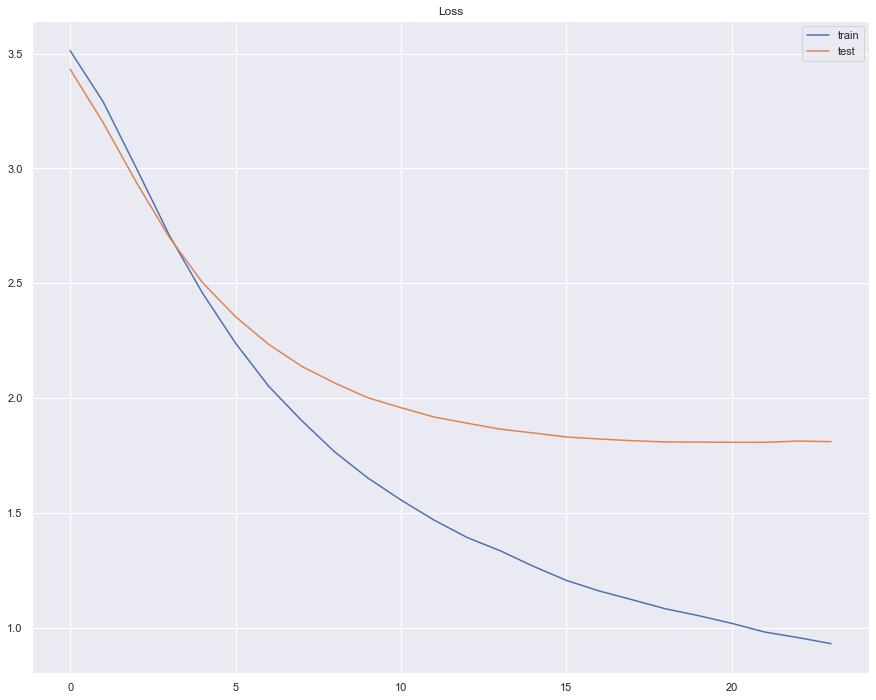

In [75]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

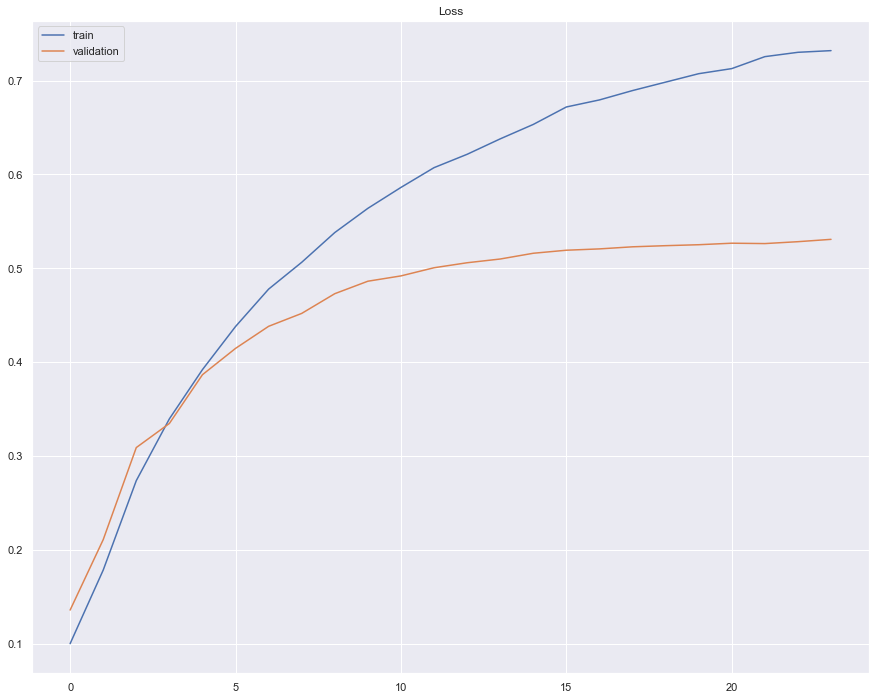

In [76]:
plt.title('Loss')
plt.plot(history.history['categorical_accuracy'], label='train')
plt.plot(history.history['val_categorical_accuracy'], label='validation')
plt.legend()
plt.show();

In [86]:
text = "Raging waves of the sea, foaming out their own shame; wandering stars, to whom is reserved the blackness of darkness for ever."
array = np.array([convert2vec(text)])
array = np.expand_dims(array,2)
arr = model.predict(array,batch_size=None,verbose=0,steps=None)
print("max value:",max(arr[0]),"|| index:",np.argmax(arr, axis=None),"book:",books[np.argmax(arr, axis=None)],'\n')
print(arr)

max value: 0.95597094 || index: 64 book: Jude 

[[4.01269926e-06 1.04914025e-05 3.30188050e-04 5.10784048e-05
  1.02209224e-05 1.14466889e-06 1.92450284e-06 6.19275283e-07
  4.75138279e-07 6.96349671e-05 1.93080559e-05 5.99264516e-04
  1.34311733e-04 1.00085665e-04 1.06186917e-06 7.00637202e-06
  4.32323844e-07 2.16168840e-03 2.81486660e-02 1.76746456e-03
  1.20244329e-06 2.65013005e-05 6.02478045e-04 2.07508449e-03
  1.84017073e-04 7.69752369e-05 4.08392298e-05 4.95260162e-03
  1.32904588e-05 3.57952854e-06 6.79909988e-07 7.19169184e-05
  3.42029925e-05 4.90894963e-05 2.52198970e-05 3.31016454e-05
  4.21543085e-08 1.66723783e-06 1.11547664e-07 4.47109691e-04
  7.81135925e-04 2.36271546e-04 1.54390591e-06 2.97015853e-04
  1.40966304e-05 3.12058432e-06 4.72580678e-06 5.49622655e-07
  1.27075100e-05 7.72158671e-07 1.01084379e-05 5.50706645e-05
  1.02518829e-08 1.73166347e-06 4.89755403e-05 8.59703562e-08
  4.56936021e-07 4.04129562e-04 6.09092012e-07 1.59950687e-05
  3.80822530e-05 2.819

In [28]:
test_data_y[22:23]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

In [29]:
from sklearn.metrics import classification_report

pred = model.predict(test_data_x,batch_size=None,verbose=0,steps=None)
pred

array([[9.6767288e-01, 6.2829460e-04, 1.7913280e-02, ..., 1.8820251e-04,
        1.3410087e-06, 2.7683511e-04],
       [4.2778623e-01, 4.8283819e-02, 4.6558362e-03, ..., 4.3257853e-04,
        3.0880250e-04, 3.8150065e-02],
       [4.3841013e-01, 1.9998239e-02, 7.8571169e-03, ..., 2.4410681e-04,
        5.0446257e-04, 1.0249539e-02],
       ...,
       [1.0964374e-06, 1.6032845e-05, 3.9076658e-06, ..., 4.0223087e-09,
        3.0370144e-09, 1.2208829e-01],
       [8.0418613e-06, 8.3233620e-04, 4.2561308e-04, ..., 1.5255322e-06,
        5.8602723e-06, 3.3737946e-01],
       [1.3207326e-03, 1.5359086e-05, 3.1503019e-05, ..., 3.8537505e-07,
        5.7145133e-10, 3.7765852e-01]], dtype=float32)

In [78]:
#check for overfitting by test loss
model.fit(test_data_x, test_data_y, epochs=5, batch_size=8)

Epoch 1/5
1857/1857 [==============================] - 32s 17ms/step - loss: 2.1020 - categorical_accuracy: 0.4653
Epoch 2/5
1857/1857 [==============================] - 32s 17ms/step - loss: 1.6050 - categorical_accuracy: 0.5606
Epoch 3/5
1857/1857 [==============================] - 32s 17ms/step - loss: 1.3481 - categorical_accuracy: 0.6128
Epoch 4/5
1857/1857 [==============================] - 32s 17ms/step - loss: 1.1904 - categorical_accuracy: 0.6478
Epoch 5/5
1857/1857 [==============================] - 33s 18ms/step - loss: 1.0622 - categorical_accuracy: 0.6793


some statistics about the data

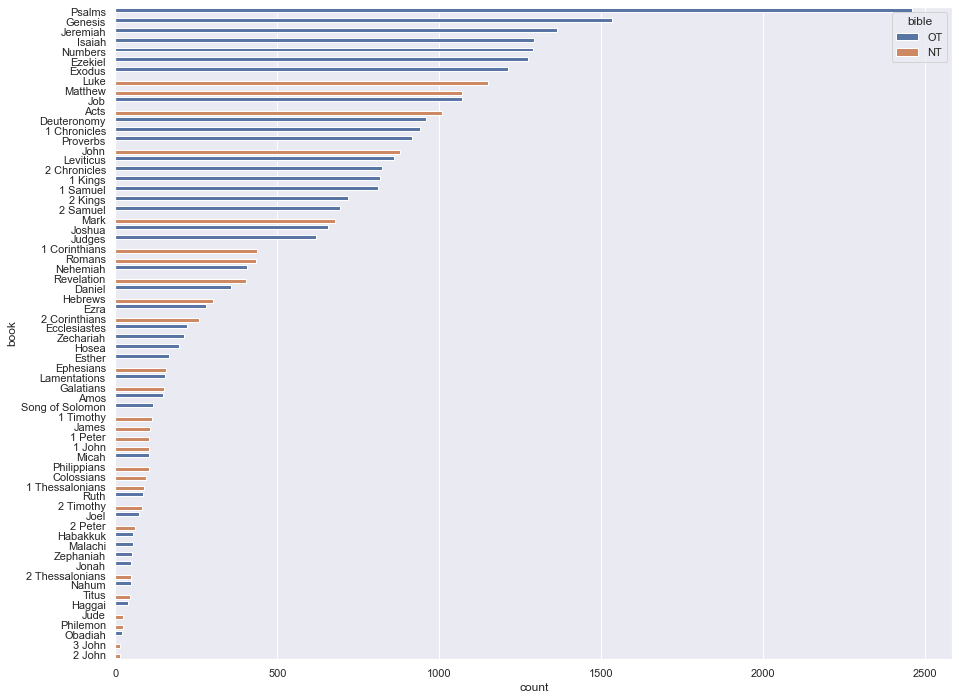

In [39]:
#examining distributions over books and bible
import seaborn as sns
sns.set_style("darkgrid")
sns.set()
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,12)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)

OT_books = ['Genesis', 'Exodus', 'Leviticus', 'Numbers', 'Deuteronomy', 'Joshua', 'Judges',

            'Ruth', '1 Samuel', '2 Samuel', '1 Kings', '2 Kings', '1 Chronicles', '2 Chronicles',

            'Ezra', 'Nehemiah', 'Esther', 'Job', 'Psalms', 'Proverbs', 'Ecclesiastes',

            'Song of Solomon', 'Isaiah', 'Jeremiah', 'Lamentations', 'Ezekiel', 'Daniel',

            'Hosea', 'Joel', 'Amos', 'Obadiah', 'Jonah', 'Micah', 'Nahum', 'Habakkuk',

            'Zephaniah', 'Haggai',    'Zechariah',    'Malachi']

NT_books = ['Matthew', 'Mark', 'Luke', 'John', 'Acts', 'Romans', '1 Corinthians',

            '2 Corinthians', 'Galatians', 'Ephesians', 'Philippians', 'Colossians',

            '1 Thessalonians', '2 Thessalonians', '1 Timothy', '2 Timothy', 'Titus', 'Philemon',

            'Hebrews', 'James', '1 Peter', '2 Peter', '1 John', '2 John', '3 John', 'Jude',

            'Revelation']

def book_to_bible(x):
    if x in OT_books:
        return 'OT'
    elif x in NT_books:
        return 'NT'
    else:
        return -1
    
# data = data.drop(['citation'], axis = 1)
data['bible'] = data.book.apply(book_to_bible)
data.bible.value_counts(normalize=True)


ax = sns.countplot(y="book", 
                   hue="bible", 
                   data=data, 
                   order=data.book.value_counts().index)

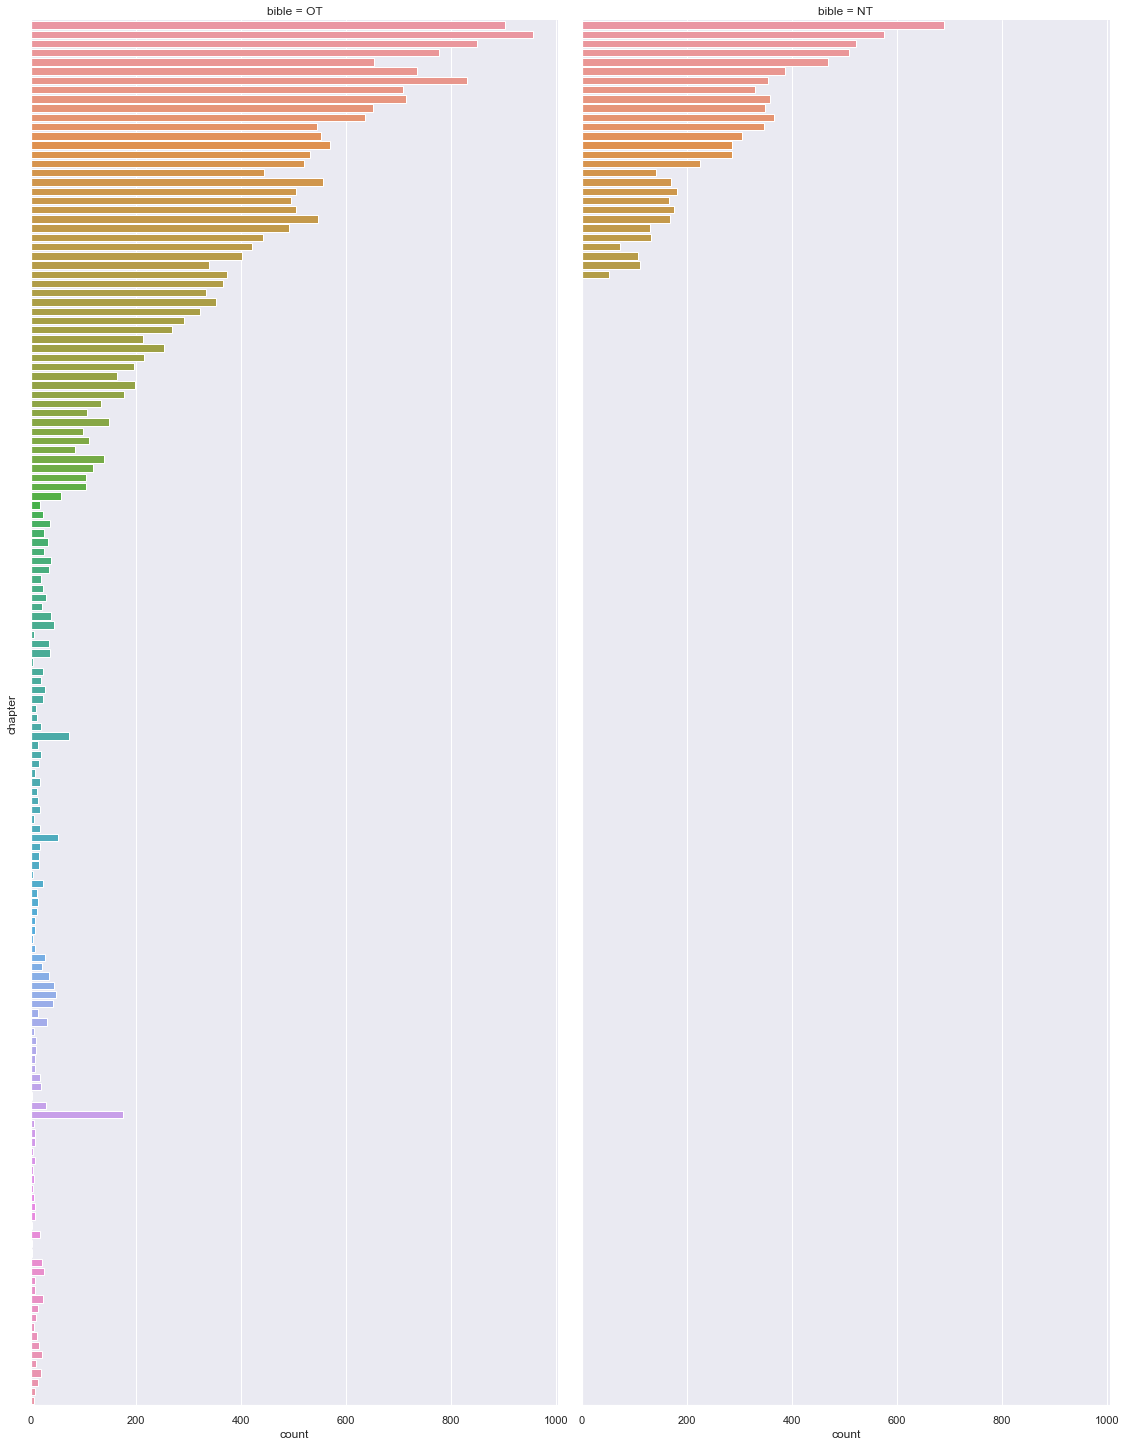

In [40]:
#distribution of chapter by bibles
ax = sns.catplot(y="chapter", 
                   col="bible", 
                   data=data,
                   kind="count",
                   height=20, aspect=.4)
for x in ax.axes.flat:
    labels = x.get_yticklabels()
    for i,l in enumerate(labels):
        if(i%5 != 0): labels[i] = '' 
    x.set_yticklabels(labels) 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


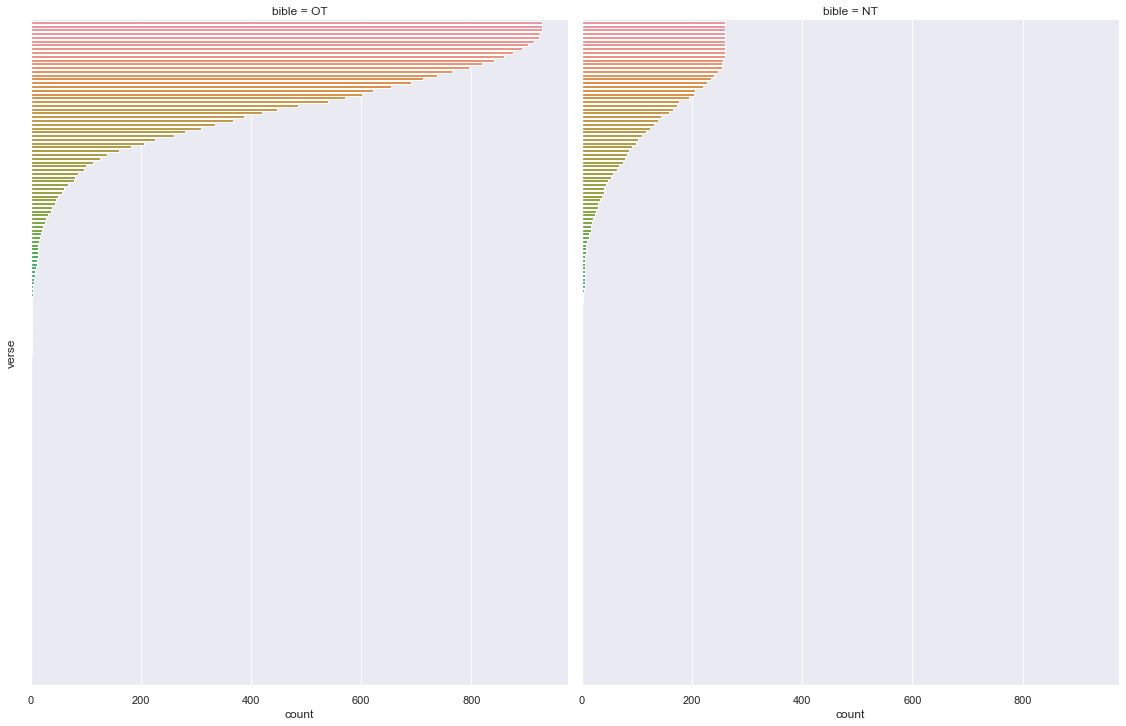

In [41]:
#distribution of verses by bibles
ax = sns.factorplot(y="verse", 
                   col="bible", 
                   data=data,
                   kind="count",
                   size=10, aspect=.8)
for x in ax.axes.flat:
    labels = x.get_yticklabels() 
    for i,l in enumerate(labels):
        if(i%5 != 0): labels[i] = '' 
    x.set_yticklabels(labels) 

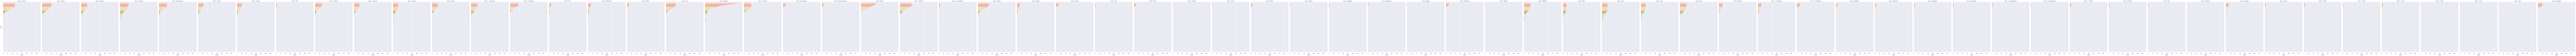

In [42]:
#distribution of verses by book
ax = sns.factorplot(y="verse", 
                   col="book", 
                   data=data,
                   kind="count",
                   size=8, aspect=.7)
for x in ax.axes.flat:
    labels = x.get_yticklabels() 
    for i,l in enumerate(labels):
        if(i%5 != 0): labels[i] = '' 
    x.set_yticklabels(labels) 